In [1]:
#working correctly
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import shutil
from PIL import Image
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import random

In [62]:
TRAIN_DIR = '../input/flowers-recognition/flowers/'
TEST_DIR = 'test_data/'
#os.mkdir('test_data')
IMG_SIZE = 100
LR = 1e-3
os.listdir()

['__notebook_source__.ipynb', '.ipynb_checkpoints', 'test_data']

In [33]:
#25 random files from each sample have been placed into TEST_DIR
path = os.listdir(TRAIN_DIR)
#print(path)
for x in path:
    #appending name to the path
    if x != 'flowers':
        path_2 = os.path.join(TRAIN_DIR,x)
        #print(path_2)
        file_data = os.listdir(path_2)
        #print(file_data)
        #taking 25 pics from each sample and placing in test folder
        for num in range(25):
            index = random.randrange(0, len(file_data))
            #print(file_data[index])
            path_source = os.path.join(path_2,file_data[index])
            #print(path_source)
            move_file = shutil.copy(path_source, TEST_DIR)

In [161]:
#working now
def label_image(path_source):
    word_label = path_source.split('/')[4]
    if word_label == 'tulip': return 0
    elif word_label == 'sunflower': return 1
    elif word_label == 'rose': return 2
    elif word_label == 'daisy': return 3
    elif word_label == 'dandelion': return 4

In [162]:
#create train data
def create_train_data():
    train_data = []
    path = os.listdir(TRAIN_DIR)
    #print(path)
    for x in tqdm(path):
        #appending name to the path
        if x != 'flowers':
            path_2 = os.path.join(TRAIN_DIR,x)
            #print(path_2)
            file_data = os.listdir(path_2)
            for num in file_data:
                index = random.randrange(0, len(file_data))
                if file_data[index] != 'flickr.pyc' and file_data[index] != 'flickr.py' and file_data[index] != 'run_me.py':
                    path_source = os.path.join(path_2,file_data[index])
                    #print(path_source)
                    #print(label_image(path_source))
                    try:
                        label = label_image(path_source)
                        img = cv2.resize(cv2.imread(path_source, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE))
                        train_data.append([np.array(img),np.array(label)])
                
                    except Exception as e:
                        print(path_source)
                        print(str(e))
                        
    np.save('traindata.npy',train_data)
    print("Training data created successfully")
    return train_data
            
        


In [163]:
#working fine now
train_data = create_train_data()

100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

Training data created successfully


In [179]:
#working fine now
def process_test_data():
    test_data = []
    #path = os.listdir(TEST_DIR)
    #print(path)
    for x in tqdm(os.listdir(TEST_DIR)):
        path_2 = os.path.join(TEST_DIR,x)
        #print(x)
        try:
            img_id = x.split('.')[0]
            #print(img_id)
            img = cv2.resize(cv2.imread(path_2, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE))
            test_data.append([np.array(img),np.array(img_id)])
        
        except Exception as e:
            print(path_source)
            print(str(e))
    np.save('testdata.npy',train_data)
    print("Testing data created successfully")
    return test_data

In [180]:
test_data = process_test_data()

100%|██████████| 123/123 [00:00<00:00, 752.80it/s]


Testing data created successfully


In [157]:
my_model = Sequential()
my_model.add(Conv2D(32,(2,2),activation='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
my_model.add(Conv2D(64,(2,2),activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Conv2D(32,(2,2),activation='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
my_model.add(Conv2D(64,(2,2),activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Flatten())
my_model.add(Dense(128,activation='relu'))
my_model.add(Flatten())
my_model.add(Dense(5,activation='softmax'))

In [164]:
X = ([i[0] for i in train_data])
X = np.array(X)
X = X.reshape(X.shape[0], IMG_SIZE, IMG_SIZE, 1)

Y = ([i[1] for i in train_data])
Y = np.array(Y)

In [165]:
my_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [166]:
my_model.fit(X,Y, epochs = 5, validation_split = 0.15)

Train on 3672 samples, validate on 649 samples
Epoch 1/5
3672/3672 [==============================] - 66s 18ms/sample - loss: 8.1602 - accuracy: 0.3619 - val_loss: 2.3102 - val_accuracy: 0.1125
Epoch 2/5
3672/3672 [==============================] - 65s 18ms/sample - loss: 0.9303 - accuracy: 0.6697 - val_loss: 2.0736 - val_accuracy: 0.2943
Epoch 3/5
3672/3672 [==============================] - 65s 18ms/sample - loss: 0.4766 - accuracy: 0.8429 - val_loss: 2.1896 - val_accuracy: 0.4438
Epoch 4/5
3672/3672 [==============================] - 66s 18ms/sample - loss: 0.2322 - accuracy: 0.9319 - val_loss: 1.7521 - val_accuracy: 0.6163
Epoch 5/5
3672/3672 [==============================] - 67s 18ms/sample - loss: 0.1045 - accuracy: 0.9725 - val_loss: 1.7350 - val_accuracy: 0.5917


In [167]:
import matplotlib.pyplot as plt

In [181]:
test_data = process_test_data()

100%|██████████| 123/123 [00:00<00:00, 757.05it/s]


Testing data created successfully


ValueError: cannot reshape array of size 10000 into shape (1,200,200,1)

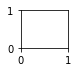

In [198]:
fig = plt.figure()
for num, data in enumerate(test_data[:30]):
    img_num = data[1]
    img_data_test = data[0]
    y = fig.add_subplot(5,6,num+1)
    #y = fig.tight_layout(pad=0.5)
    orig = data[0]
    #data = np.array(data)
    data = orig.reshape(1,IMG_SIZE, IMG_SIZE,1)
    model_out = my_model.predict([data])[0]
    #print(model_out)
    if np.argmax(model_out) == 0: str_label = 'Tulip'
    elif np.argmax(model_out) == 1: str_label = 'Sunflower' 
    elif np.argmax(model_out) == 2: str_label = 'Rose'
    elif np.argmax(model_out) == 3: str_label = 'Daisy'
    elif np.argmax(model_out) == 4: str_label = 'Dandelion'
    #else: str_label = 'Dog'
    y.imshow(orig,cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    y = fig.tight_layout(pad=0.5)
    
plt.show()